# To predict the laon status ,as approved or not approved, based on the customer details - Binary classification problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [3]:
train_original=train.copy()
test_original=test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.shape,test.shape

((614, 13), (367, 12))

In [7]:
train.dtypes #object datatype means categorical variables

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [9]:
#Univariate analysis ( independant analysis of each variable from the dataset)
# categorical varibles are analysed using frequency table,percentage distribution and bar plot

In [10]:
# categorical Variable analysis

In [11]:
train['Loan_Status'].value_counts() # frequency table

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
train['Loan_Status'].value_counts(normalize=True) # percentage distribution

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

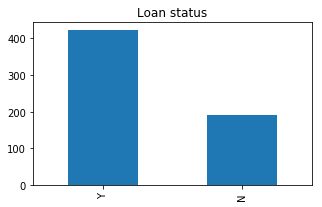

In [13]:
train['Loan_Status'].value_counts().plot.bar(title='Loan status',figsize=(5,3))# bar plot


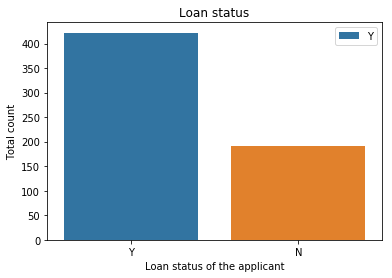

In [14]:
sns.countplot(train['Loan_Status'])
plt.title('Loan status')
plt.xlabel('Loan status of the applicant')
plt.ylabel('Total count')
plt.legend('Yes or No')

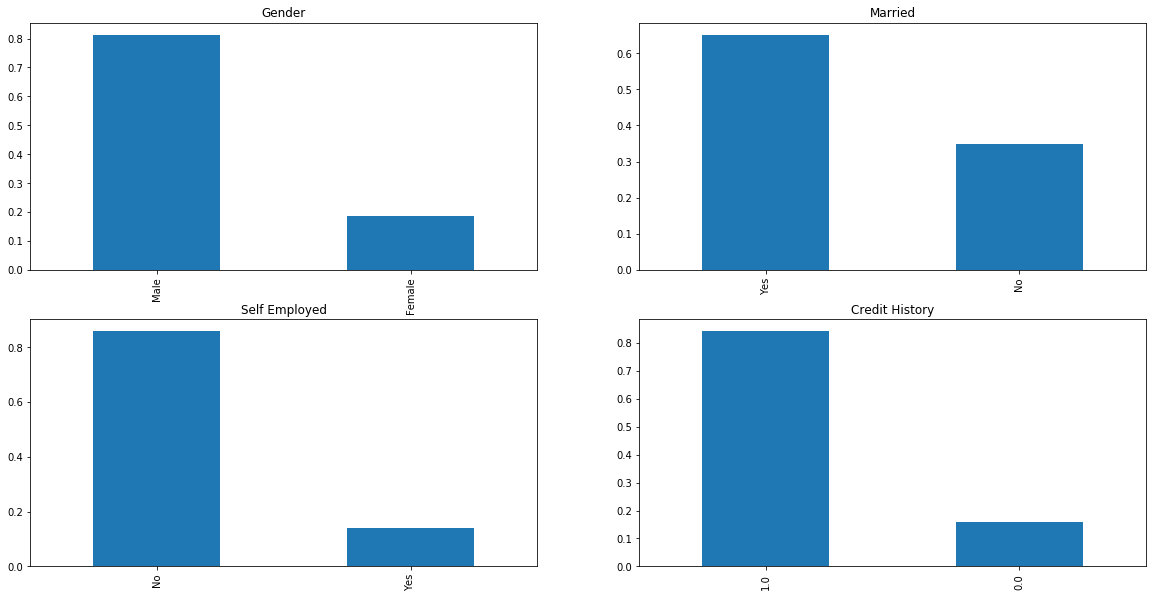

In [15]:
plt.figure()
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender',figsize=(20,10))
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')
plt.show()

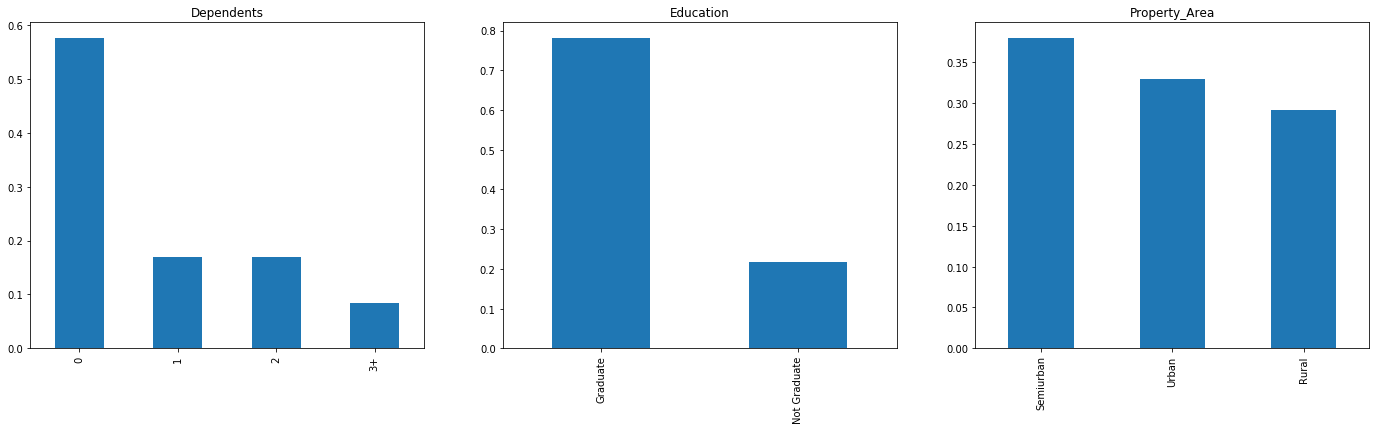

In [16]:
plt.figure() 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

In [17]:
# Numerical variables(int and float type) are analysed using probability density plot

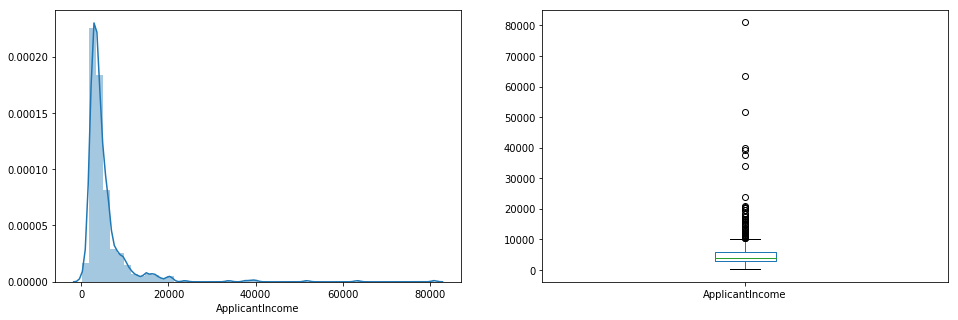

In [18]:
plt.figure()
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

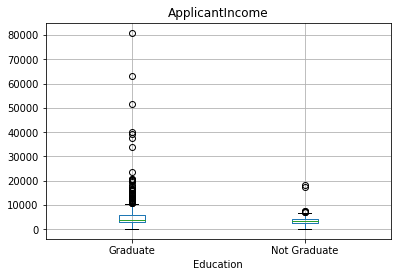

In [19]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

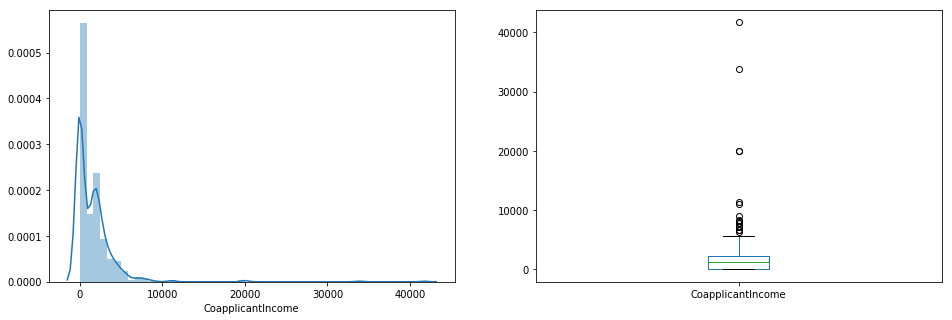

In [20]:
plt.figure()
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [22]:
train.describe() # summarises all numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [23]:
import pandas_profiling

In [24]:
profile=pandas_profiling.ProfileReport(train)

In [25]:
profile.to_file('Descriptive stat for Loan Prediction.html')

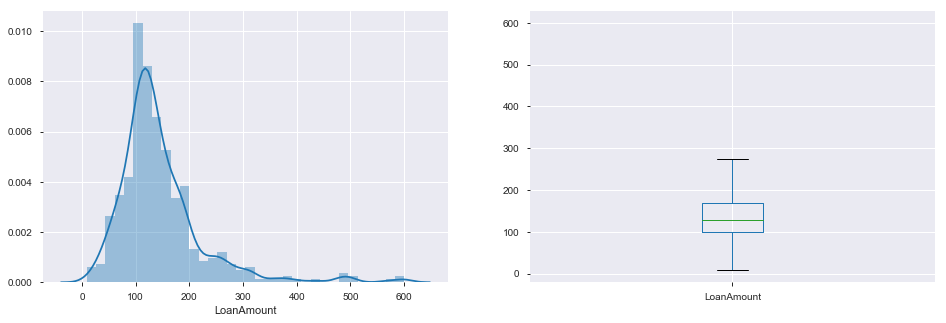

In [26]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['LoanAmount'])
plt.subplot(122) 
df['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

#### Bivariate analysis to check the correlation between independent variables 

In [27]:
# Gender and Loan status

In [28]:
gender=pd.crosstab(train['Gender'],train['Loan_Status'])

In [29]:
gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


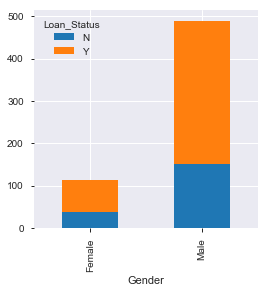

In [30]:
gender.plot.bar(stacked=True,figsize=(4,4))

In [31]:
#married and loan status, Education and loan status etc
married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

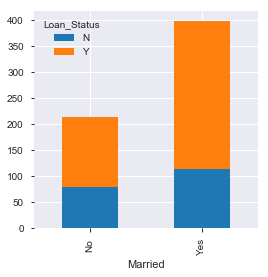

In [32]:
married.plot.bar(stacked=True,figsize=(4,4))


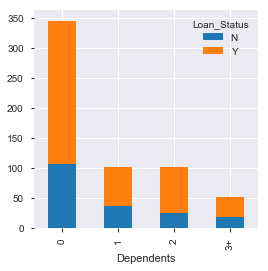

In [33]:
Dependents.plot.bar(stacked=True,figsize=(4,4))

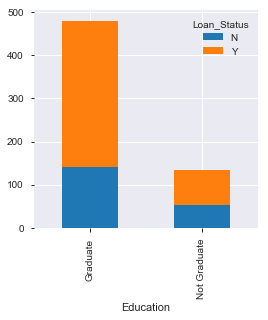

In [34]:
Education.plot.bar(stacked=True, figsize=(4,4))

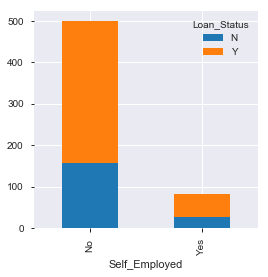

In [35]:
Self_Employed.plot.bar(stacked=True,figsize=(4,4))

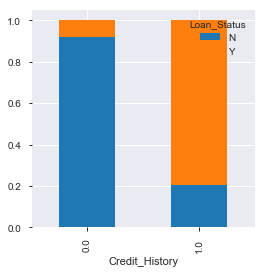

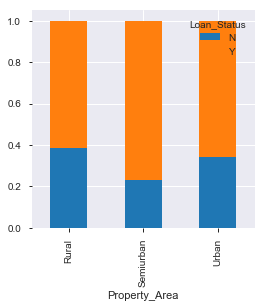

In [36]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4,)) 
plt.show()

In [37]:
# Numerical variable bivaraite analysis

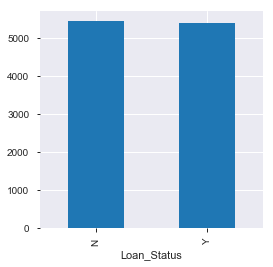

In [38]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(figsize=(4,4))

In [39]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
train['income_bin']=pd.cut(train['ApplicantIncome'],bins, group)

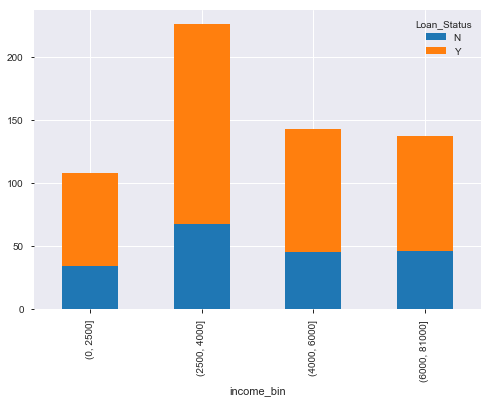

In [40]:
incomebin=pd.crosstab(train['income_bin'],train['Loan_Status'])
incomebin.plot.bar(stacked=True)

Text(0, 0.5, 'Percentage')

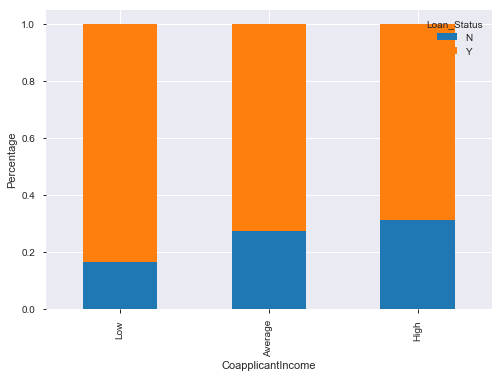

In [41]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

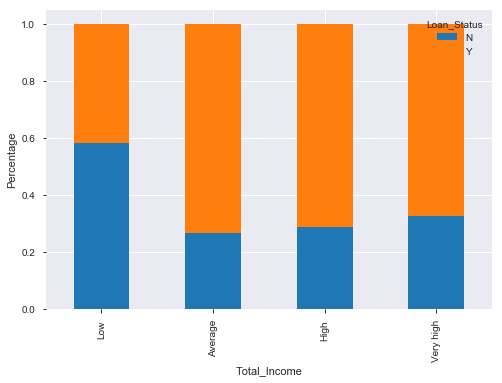

In [42]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

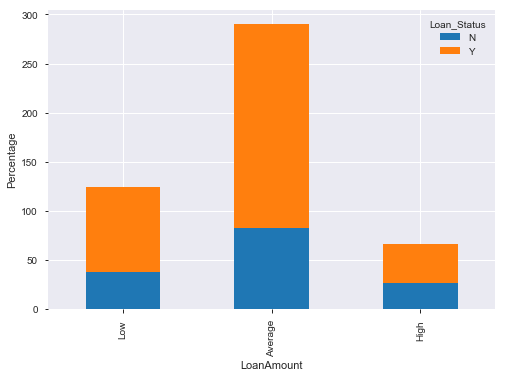

In [43]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
plt.ylabel('Percentage')

In [44]:
#Dropping the additional columns created
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'income_bin', 'Coapplicant_Income_bin', 'Total_Income',
       'Total_Income_bin', 'LoanAmount_bin'],
      dtype='object')

In [45]:
train=train[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount',
           'Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']]

In [46]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [47]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [48]:
# Replacing with numerical varaiables

train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

In [49]:
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

In [50]:
#To find correlation between numerical features
cor=train.corr()

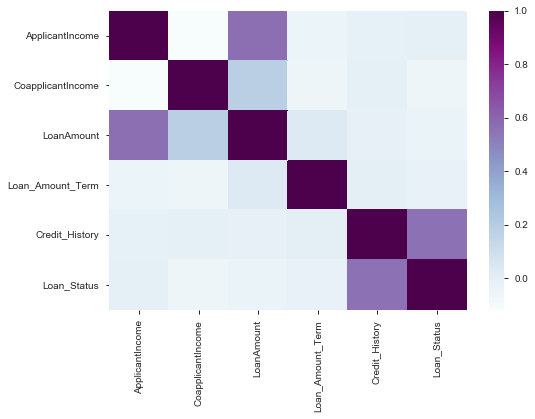

In [51]:
sns.heatmap(cor,cmap="BuPu") # high correlation between applicantincome & loan amount  Also credit history & loan status

In [52]:
# Missing value imputation
#For numerical variables: imputation using mean or median
#For categorical variables: imputation using mode

In [53]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
# categorical missing values in :-  Gender,Married,dependents,selfemployed
# Numerical missing values in :- Loanamount,loan amount term,credit history
#Gender, Married, Dependents, Credit_History and Self_Employed

In [55]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [56]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [57]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

In [58]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [59]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [60]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [61]:
train['LoanAmount'].mean(),train['LoanAmount'].median()

(146.41216216216216, 128.0)

In [62]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [63]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [64]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [65]:
train.isnull().sum() # all missing values (Nan) are imputed

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [66]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [67]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

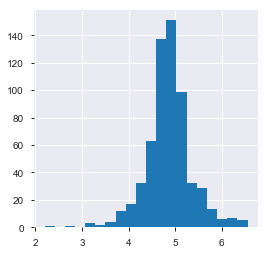

In [68]:
# outlier treatment
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20,figsize=(4,4))

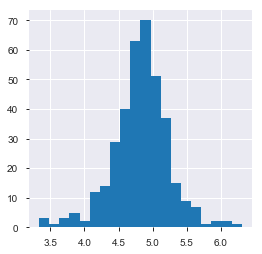

In [69]:
test['LoanAmount_log']=np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20,figsize=(4,4))

In [70]:
#Model Building

In [71]:
#train=train.drop(['Loan_ID'],axis=1)

In [72]:
test=test.drop(['Loan_ID'],axis=1)

In [73]:
X=train.drop(['Loan_Status'],axis=1)

In [74]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [75]:
X=train[['Credit_History','Loan_Amount_Term']]

In [76]:
y=train['Loan_Status']

In [77]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [78]:
#x_train.shape,y_train.shape

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_cv=sc.transform(x_cv)

In [99]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [102]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [103]:
pred_cv = model.predict(x_cv)

In [104]:
cm=confusion_matrix(y_cv, pred_cv)
cm

array([[ 26,  25],
       [ 10, 124]], dtype=int64)

In [105]:
accuracy_score(y_cv,pred_cv)

0.8108108108108109

In [86]:
#np_test=np.array(test)
x_train.shape,test.shape

((429, 2), (367, 21))

In [87]:
test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [88]:
test=test[['Credit_History','LoanAmount_log']]

In [89]:
pred_test = model.predict(test)

In [90]:
#submission

In [95]:
submission=pd.read_csv("sample_submission.csv")

In [96]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [97]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [98]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')